# Course End Project : Diabetic Retinopathy Detection 

# Academic Institution: SimpliLearn

## Prgram: PG AI

## Course No.6: Advanced Deep Learning and Computer Vision

## Learner : Chaitanya Kumar Battula

## Academic Advisior: Sayan Dey

## Submitted on : 08-Jun-2021

# Tasks

## Steps to be followed: 

## Download and preprocess the dataset to correct for noise and under and over exposure

## Augment the dataset and split it into training and test sets

## Define the distributed training strategy

## Define the number of shared instances

## Define a CNN architecture to extract features from the model data

## Define parameters like the loss, optimizer, epochs, learning rate, and evaluation metric

## Define checkpoints

## Train the model until an accuracy of at least 80% is obtained

## Save the model

## Deploy the saved model using TensorFlow Serving

# Step.1    Import Libraries

In [1]:
import os
import sys
import datetime


from tqdm import tqdm
from cv2 import cv2
from PIL import Image


import numpy as np # linear algebra
from numpy import array
from numpy import savez_compressed
from numpy import load


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf


import keras
from keras.layers import Dense, Dropout, Flatten, Input 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('>>Imported all required Libraries.')

>>Imported all required Libraries.


# Step.2     Import data set 

## Step.2-1   Sample a single image file and understand its attributes

img_type: <class 'numpy.ndarray'>
imd_ndim: 3
img_shape: (3264, 4928, 3)


<function matplotlib.pyplot.show(*args, **kw)>

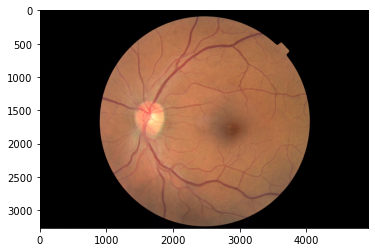

In [2]:
path=r"C:\Users\USER\1 PGP AI\Diabetic-Retinopathy\Image_dataset\851_left.jpeg"

img = cv2.imread(path)
print("img_type:", type(img))
print("imd_ndim:", img.ndim)
print("img_shape:", img.shape)

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

## Step.2-2    Import  a csv file that has the target  labels

In [3]:
df_train = pd.read_csv('trainLabels.csv')
type(df_train.values)

numpy.ndarray

In [4]:
df_train.head()

,image,level
0,84_left,0
1,84_right,0
2,95_left,0
3,95_right,0
4,99_left,3


Understand that there are MORE than 2nos classes and requires further processing


##  Step-2.3        Data  imbalance cheque

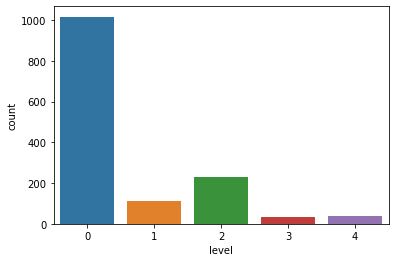

In [5]:
sns.countplot("level",data= df_train)

Comments:

Data is definitely imbalanced and requires augmentation.

## Step  2.3      Extract Features 

In [6]:
y1 = pd.Series(df_train['level'])
y1[0]

0

###  Observation

There are 5types of lables 0/1/2/3/4  or 5nos classes and each stands for as follows

Class — Name

0 — Normal

1 — Mild NPDR

2 — Moderate NPDR

3 — Severe NPDR

4 — PDR

# Step.3-     Load images and labels

## Step.3-1   Read Image Names as in Image data set

In [7]:
i = 0 
for f, breed in tqdm(df_train.values):
    print(f)

 18%|█████████████▌                                                               | 252/1427 [00:00<00:00, 2517.25it/s]

84_left
84_right
95_left
95_right
99_left
99_right
842_left
842_right
844_left
844_right
845_left
845_right
851_left
851_right
857_left
857_right
862_left
862_right
863_left
863_right
865_left
865_right
866_left
866_right
869_left
869_right
876_left
876_right
877_left
877_right
878_left
878_right
879_left
879_right
880_left
880_right
885_left
885_right
886_left
886_right
897_left
897_right
899_left
899_right
904_left
904_right
905_left
905_right
906_left
906_right
909_left
909_right
910_left
910_right
912_left
912_right
914_left
914_right
916_left
916_right
917_left
917_right
921_left
921_right
925_left
925_right
928_left
928_right
929_left
929_right
930_left
930_right
931_left
931_right
932_left
932_right
934_left
934_right
935_left
935_right
936_left
936_right
939_left
939_right
940_left
940_right
941_left
941_right
943_left
943_right
945_left
945_right
947_left
947_right
953_left
953_right
958_left
958_right
959_left
959_right
960_left
960_right
963_left
963_right
966_left
966_right

100%|████████████████████████████████████████████████████████████████████████████| 1427/1427 [00:00<00:00, 5457.89it/s]

9499_left
9499_right
9502_left
9502_right
9503_left
9503_right
9505_left
9505_right
9507_left
9507_right
9509_left
9509_right
9511_left
9511_right
9513_left
9513_right
9516_left
9516_right
9517_left
9517_right
9518_left
9518_right
9521_left
9521_right
9525_left
9525_right
9526_left
9526_right
9528_left
9528_right
9529_left
9529_right
9535_left
9535_right
9536_left
9536_right
9538_left
9538_right
9539_left
9539_right
9540_left
9540_right
9542_left
9542_right
9544_left
9544_right
9545_left
9545_right
9546_left
9546_right
9547_left
9547_right
9549_left
9549_right
9553_left
9553_right
9555_left
9555_right
9560_left
9560_right
9564_left
9564_right
9566_left
9566_right
9569_left
9569_right
9570_left
9570_right
9573_left
9573_right
9578_left
9578_right
9584_left
9584_right
9586_left
9586_right
9587_left
9587_right
9589_left
9589_right
9590_left
9590_right
9592_left
9592_right
9593_left
9593_right
9595_left
9595_right
9598_left
9598_right
9601_left
9601_right
9602_left
9602_right
9603_left
960

## Step.3-2  Convert jpeg images to numpay array data 

In [8]:
rows = 128
cols = 128

X2 = []
y2 = []


i = 0 
for f, breed in tqdm(df_train.values):
    if type(cv2.imread('Image_dataset/{}.jpeg'.format(f)))==type(None):
        continue
    else:
        img = cv2.imread('Image_dataset/{}.jpeg'.format(f))
        X2.append(cv2.resize(img, (rows, cols)).flatten())
        label = y1[i]
        y2.append(label)
        i += 1

X2 = np.array(X2)    
    
X3 = np.array(X2, dtype='float32')/255
y3 = np.array(y2)



print("X3-Shape:", X3.shape)
print("Y3-Shape:", y3.shape)


print("\n\n\nAll jpeg images converted to numpy arrays.")





100%|██████████████████████████████████████████████████████████████████████████████| 1427/1427 [05:01<00:00,  4.74it/s]


X3-Shape: (1390, 49152)
Y3-Shape: (1390,)



All jpeg images converted to numpy arrays.


# Step.4    Data split  to train and Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split( X3, y3, test_size=.05, random_state=10)
print("x_train.shape:", x_train.shape)
print("x_test.shape:",   x_test.shape)

print("y_train.shape:", y_train.shape)
print("y_test.shape:",  y_test.shape)

x_train.shape: (1320, 49152)
x_test.shape: (70, 49152)
y_train.shape: (1320,)
y_test.shape: (70,)


# Step.5   Deal Unbalanced Data

##  Step-5.1    Balance data by Over sampling 

In [10]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy="minority")

X_Over, y_train  = smote.fit_resample(x_train, y_train)

print("< Balancing the Unbalanced data:>")
print()
print("Data size Prior Oversampling:")
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y3.shape)
print()

print("Data size After Oversampling/Balanced:")
print("X_Over.shape:", X_Over.shape )
print("y_train.shape:", y_train.shape )

< Balancing the Unbalanced data:>

Data size Prior Oversampling:
x_train.shape: (1320, 49152)
y_train.shape: (1390,)

Data size After Oversampling/Balanced:
X_Over.shape: (2238, 49152)
y_train.shape: (2238,)


##  Step-5.2    Reshape Data suitably as required for a CNN Model

In [11]:
Image_Size        = (rows, cols)
Image_Size_List   = list(Image_Size)
Rank = 3
Image_Size_List.append(Rank)

Image_Shape    = tuple(Image_Size_List)
print("Original Single Image Shape:", Image_Shape)
print()



# Reshape the Images
x_train   = X_Over.reshape(X_Over.shape[0], *Image_Shape)
x_test    = x_test.reshape(x_test.shape[0],   *Image_Shape)




print("< DATA SHAPES AFTER  RESHAPING >")
print("\n\n")
print("x_train.shape:", x_train.shape)
print("x_test.shape:",   x_test.shape)

print("\n")
print("y_train.shape:", y_train.shape)
print("y_test.shape:",  y_test.shape)

Original Single Image Shape: (128, 128, 3)

< DATA SHAPES AFTER  RESHAPING >



x_train.shape: (2238, 128, 128, 3)
x_test.shape: (70, 128, 128, 3)


y_train.shape: (2238,)
y_test.shape: (70,)


# Step.6     Define a CNN Model

In [12]:
CNN_Model= Sequential([ Conv2D(filters=36, kernel_size=2, activation='relu', input_shape= Image_Shape),
                        MaxPooling2D(pool_size=2),
                        Conv2D(filters=54, kernel_size=2, activation='relu', input_shape= Image_Shape),
                        MaxPooling2D(pool_size=2),
                        Conv2D(filters=100, kernel_size=2, activation='relu', input_shape= Image_Shape),
                        MaxPooling2D(pool_size=2),
                        Flatten(),
                        Dense(2048, activation='relu'),
                        Dropout(0.5),
                        Dense(1024, activation='relu'),
                        Dropout(0.5),
                        Dense(512, activation='relu'),
                        Dropout(0.5),
                        Dense(5, activation='softmax')  
                      ])

CNN_Model.compile( loss='sparse_categorical_crossentropy',
                    optimizer=Adam(lr=0.0001),
                    metrics=['accuracy']
                )



CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 36)      468       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 54)        7830      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 54)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 100)       21700     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 22500)             0

# Step.7     Train  the Model

In [13]:
Training_Start_time = datetime.datetime.now()
print("Traing Start Time :",   Training_Start_time )
print("Model training is in Progress. It will take a few hours..Please be patient.\n")


batch_size = 128
epochs = 200
verbose = 2


Model_Training_history = CNN_Model.fit( np.array(x_train), np.array(y_train), 
                         batch_size = batch_size, 
                         epochs = epochs, 
                         verbose = verbose,
                         validation_data = (np.array(x_test), 
                                            np.array(y_test))     )







Training_End_time = datetime.datetime.now()  
time_delta = (Training_End_time - Training_Start_time )
total_seconds = time_delta.total_seconds()
minutes = total_seconds/60




print("Traing Start Time :",   Training_Start_time )
print("Traing End Time   :",   Training_End_time )
print("Total time taken for Training the model(mins):", int(minutes) )

Traing Start Time : 2021-06-08 11:01:13.512210
Model training is in Progress. It will take a few hours..Please be patient.

Epoch 1/200
18/18 - 49s - loss: 1.2971 - accuracy: 0.4039 - val_loss: 1.4015 - val_accuracy: 0.0429
Epoch 2/200
18/18 - 33s - loss: 1.2132 - accuracy: 0.4669 - val_loss: 1.4190 - val_accuracy: 0.1000
Epoch 3/200
18/18 - 33s - loss: 1.1983 - accuracy: 0.4768 - val_loss: 1.3762 - val_accuracy: 0.3286
Epoch 4/200
18/18 - 33s - loss: 1.1668 - accuracy: 0.5022 - val_loss: 1.3737 - val_accuracy: 0.3429
Epoch 5/200
18/18 - 35s - loss: 1.1387 - accuracy: 0.5340 - val_loss: 1.3288 - val_accuracy: 0.4714
Epoch 6/200
18/18 - 35s - loss: 1.0735 - accuracy: 0.6041 - val_loss: 1.3604 - val_accuracy: 0.4714
Epoch 7/200
18/18 - 36s - loss: 1.0221 - accuracy: 0.6466 - val_loss: 1.2851 - val_accuracy: 0.5000
Epoch 8/200
18/18 - 35s - loss: 0.9640 - accuracy: 0.6586 - val_loss: 1.4376 - val_accuracy: 0.4000
Epoch 9/200
18/18 - 34s - loss: 0.9172 - accuracy: 0.6814 - val_loss: 1.1647

Epoch 81/200
18/18 - 32s - loss: 0.3459 - accuracy: 0.8695 - val_loss: 1.4971 - val_accuracy: 0.6286
Epoch 82/200
18/18 - 33s - loss: 0.3261 - accuracy: 0.8780 - val_loss: 1.3958 - val_accuracy: 0.6286
Epoch 83/200
18/18 - 32s - loss: 0.3292 - accuracy: 0.8744 - val_loss: 1.3275 - val_accuracy: 0.6571
Epoch 84/200
18/18 - 33s - loss: 0.3217 - accuracy: 0.8771 - val_loss: 1.3656 - val_accuracy: 0.6571
Epoch 85/200
18/18 - 32s - loss: 0.3168 - accuracy: 0.8816 - val_loss: 1.3539 - val_accuracy: 0.5857
Epoch 86/200
18/18 - 33s - loss: 0.3234 - accuracy: 0.8718 - val_loss: 1.4897 - val_accuracy: 0.6000
Epoch 87/200
18/18 - 33s - loss: 0.3201 - accuracy: 0.8780 - val_loss: 1.3961 - val_accuracy: 0.6286
Epoch 88/200
18/18 - 32s - loss: 0.3053 - accuracy: 0.8847 - val_loss: 1.4479 - val_accuracy: 0.6286
Epoch 89/200
18/18 - 33s - loss: 0.2777 - accuracy: 0.8999 - val_loss: 1.4002 - val_accuracy: 0.7143
Epoch 90/200
18/18 - 33s - loss: 0.2846 - accuracy: 0.8901 - val_loss: 1.3075 - val_accurac

Epoch 162/200
18/18 - 33s - loss: 0.0248 - accuracy: 0.9942 - val_loss: 2.7673 - val_accuracy: 0.5714
Epoch 163/200
18/18 - 33s - loss: 0.0202 - accuracy: 0.9969 - val_loss: 2.7714 - val_accuracy: 0.5714
Epoch 164/200
18/18 - 33s - loss: 0.0143 - accuracy: 0.9969 - val_loss: 2.9518 - val_accuracy: 0.5714
Epoch 165/200
18/18 - 32s - loss: 0.0133 - accuracy: 0.9973 - val_loss: 3.0679 - val_accuracy: 0.6143
Epoch 166/200
18/18 - 32s - loss: 0.0148 - accuracy: 0.9978 - val_loss: 3.0110 - val_accuracy: 0.6143
Epoch 167/200
18/18 - 32s - loss: 0.0152 - accuracy: 0.9969 - val_loss: 3.2916 - val_accuracy: 0.5857
Epoch 168/200
18/18 - 33s - loss: 0.0251 - accuracy: 0.9920 - val_loss: 2.8051 - val_accuracy: 0.6571
Epoch 169/200
18/18 - 32s - loss: 0.0181 - accuracy: 0.9937 - val_loss: 2.9747 - val_accuracy: 0.6000
Epoch 170/200
18/18 - 32s - loss: 0.0226 - accuracy: 0.9942 - val_loss: 2.9653 - val_accuracy: 0.6286
Epoch 171/200
18/18 - 33s - loss: 0.0226 - accuracy: 0.9933 - val_loss: 3.1304 - v

# Step.8     Test  various metrices

##  Step.8-1   Accuracy 

In [14]:
Score = CNN_Model.evaluate( np.array(x_test),  
                            np.array(y_test), 
                            verbose=0
                          )

Loss      =  Score[0] * 100
Accuracy  =  Score[1] * 100


print("< Model Evalaution Results  >")
print('   Loss     :   {:.2f} %'.format(Loss))
print('   Accuracy :   {:.2f} %'.format(Accuracy))

< Model Evalaution Results  >
   Test accuracy :   62.86 %


In [15]:
print(Model_Training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


####      Parametrs   required   for  graphical  plot    of accuracy and loss

In [16]:
# PARAMEETRS  FOR  GRAPHICAL PLOT
accuracy     =  Model_Training_history.history['accuracy']
val_accuracy =  Model_Training_history.history['val_accuracy']

loss         =  Model_Training_history.history['loss']
val_loss     =  Model_Training_history.history['val_loss']

##  Step.8-2     Plot Model  Accuracy 

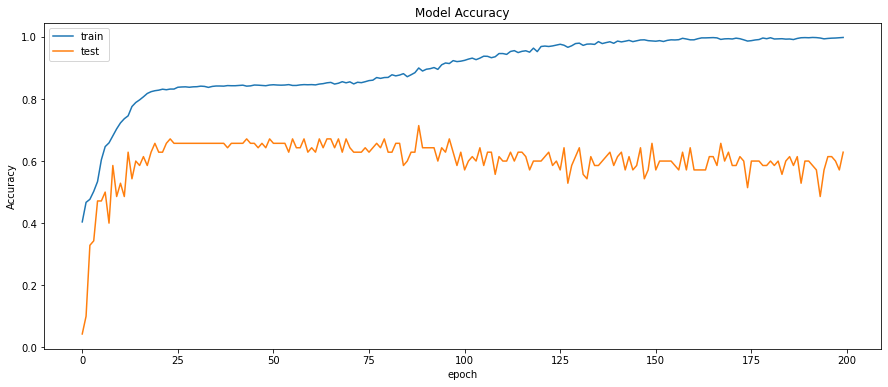

In [17]:
# PLOT  MODEL  ACCURACY
plt.figure(figsize=(15,6))
plt.plot(accuracy)
plt.plot(val_accuracy )
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vlidate'], loc='upper left')
plt.savefig('Model Accuracy.png', dpi=300, bbox_inches='tight')
plt.show()
print()




##  Step.8-2     Plot Model  Loss

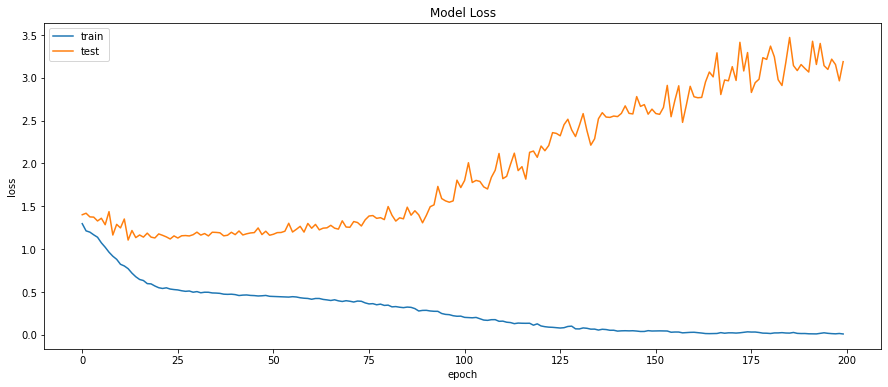

In [18]:
# PLOT  MODEL  LOSS
plt.figure(figsize=(15,6))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig('Model Loss.png', dpi=300, bbox_inches='tight')
plt.show()

##  Step.8-3     Confusion Matrix

In [19]:
y_predicted = CNN_Model.predict_classes(x_test)
print("< Confusion matrix  >\n%s" % confusion_matrix(np.array(y_test), y_predicted))

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


< Confusion matrix  >
[[41  1  4  2  0]
 [ 5  1  2  0  0]
 [ 8  0  2  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]]


###    View Confusion Matrix in a Cross Table 

In [20]:
pd.crosstab(y_test, y_predicted, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,All
Actual,,,,,
0,41,1,4,2,48
1,5,1,2,0,8
2,8,0,2,0,10
3,3,0,0,0,3
4,1,0,0,0,1
All,58,2,8,2,70


###   View Confusion Matrix Results  in a graphical representation

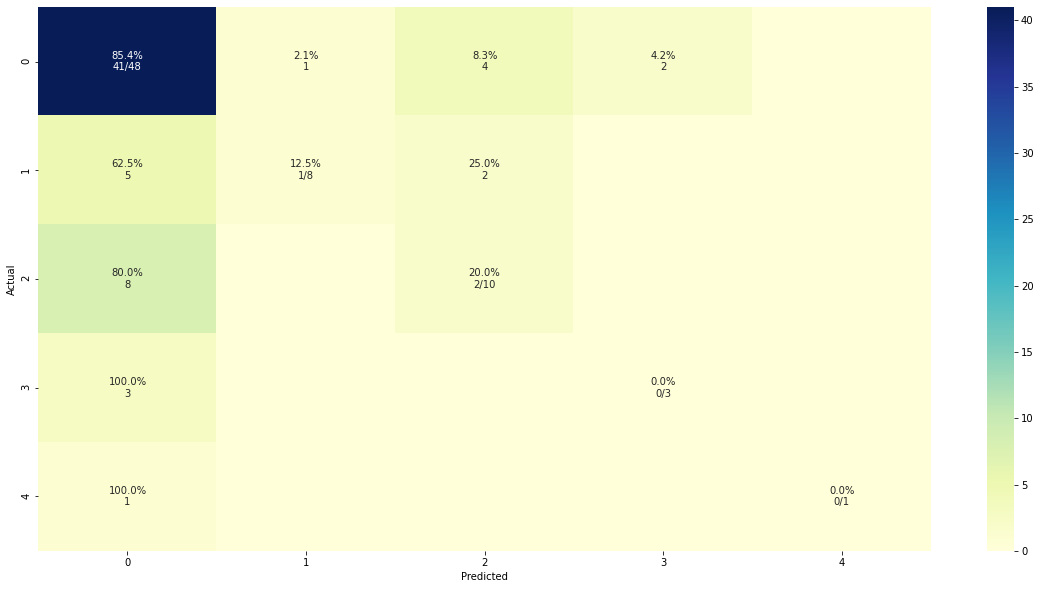

In [21]:
def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_test, y_predicted)

In [22]:
y_predicted = CNN_Model.predict_classes(x_test)
# print("y_predicted :", y_predicted )
Accuracy = accuracy_score(y_test, y_predicted)
print(" Model accuracy: %.1f %%" % (Accuracy*100))

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


 Model accuracy: 62.9 %


##  Step.8-     Classification Report

In [23]:
print("< Classification Report >\n")
print(classification_report(np.array(y_test), y_predicted))

< Classification Report >

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        48
           1       0.50      0.12      0.20         8
           2       0.25      0.20      0.22        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.63        70
   macro avg       0.29      0.24      0.24        70
weighted avg       0.58      0.63      0.59        70



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  9.   Save Model and Deploy to 

##  9.1   Save model 

In [24]:
CNN_Model.save("Diabetic_Retinopathy_Model.h5")

print("Model Saved to Disk.")

Model Saved to Disk.


##  9.2   Load Model from disk

In [25]:
from keras.models import load_model


# Load Model
model = load_model('Diabetic_Retinopathy_Model.h5')

# Summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 36)      468       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 54)        7830      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 54)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 100)       21700     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 22500)             0

##  9.3   Test Loaded Model with Unseen Data 

In [26]:
i = 0
j = i+1
sample = x_test[i:i+1]
target = y_test[j]

y_predicted = CNN_Model.predict_classes(sample)


print("<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>")
print("y_predicted  : ", *y_predicted)
print("Actual class : ", target)

<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>
y_predicted  :  0
Actual class :  0


C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
i = 10
j = i+1
sample = x_test[i:j]
target = y_test[j]

y_predicted = CNN_Model.predict_classes(sample)


print("<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>")
print("y_predicted  : ", *y_predicted)
print("Actual class : ", target)

<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>
y_predicted  :  0
Actual class :  0


In [28]:
i = 50
j = i+1
sample = x_test[i:j]
target = y_test[j]

y_predicted = CNN_Model.predict_classes(sample)


print("<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>")
print("y_predicted  : ", *y_predicted)
print("Actual class : ", target)

<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>
y_predicted  :  0
Actual class :  0


In [29]:
i = 60
j = i+1
sample = x_test[i:j]
target = y_test[j]

y_predicted = CNN_Model.predict_classes(sample)


print("<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>")
print("y_predicted  : ", *y_predicted)
print("Actual class : ", target)

<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>
y_predicted  :  0
Actual class :  0


# 10.    Learners Comments:

1]  Very delighted to find a consistent peak accuracy of almost 100% during training phase.


2] But, the accuracy drops to as lows as about   % during valdation phase.


3] I beleive the model needs to be improved futher. Will endever to improve it by applying various other techniques that are taught during the course.




# End Of The Project